# Sign Langauge Alphabet Classifier using CV2
## Taylor Lucero 
# Computer Vision and Machine Learning 

https://drive.google.com/drive/folders/1UDRvzc6WuSL_vsn8MsmEXp_IQMkmqdMY?usp=sharing

In [ ]:
#Helpful imported packages
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import os
import sys
import numpy as np
from PIL import Image
from math import cos, sin, sqrt
import io
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
from google.colab.patches import cv2_imshow
import numpy as np
import time
import random
#from cv2 import videoCaptureObject

JavaScript code to create a real time video stream.

In [ ]:
# Create a real time video stream
def VideoCapture():
  js = Javascript('''
    async function create(){
      div = document.createElement('div');
      document.body.appendChild(div);

      video = document.createElement('video');
      video.setAttribute('playsinline', '');

      div.appendChild(video);
      stream = await navigator.mediaDevices.getUserMedia({video: {facingMode: "environment"}});
      video.srcObject = stream;

      await video.play();

      canvas =  document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);

      div_out = document.createElement('div');
      document.body.appendChild(div_out);
      img = document.createElement('img');
      div_out.appendChild(img);
    }

    async function capture(){
        return await new Promise(function(resolve, reject){
            pendingResolve = resolve;
            canvas.getContext('2d').drawImage(video, 0, 0);
            result = canvas.toDataURL('image/jpeg', .90);

            pendingResolve(result);
        })
    }

    function showimg(imgb64){
        img.src = "data:image/jpg;base64," + imgb64;
    }

  ''')
  display(js)

VideoCapture()
eval_js('create()')

maxwidth = 640
maxheight = 480 


<IPython.core.display.Javascript object>

Helpful User Defined Functions

In [ ]:
def byte2image(byte):
  jpeg = b64decode(byte.split(',')[1])
  im = Image.open(io.BytesIO(jpeg))
  return np.array(im)

# this function converts bytes to images. Bytes are received from the captured video stream. 

In [ ]:
def image2byte(image):
  image = Image.fromarray(image)
  buffer = io.BytesIO()
  image.save(buffer, 'jpeg')
  buffer.seek(0)
  x = b64encode(buffer.read()).decode('utf-8')
  return x

  # This function converts images to Bytes.

In [ ]:
def detect(img, cascade):
    rects = cascade.detectMultiScale(img, scaleFactor=1.3, minNeighbors=4, minSize=(30, 30),flags=cv2.CASCADE_SCALE_IMAGE)
    if len(rects) == 0:
        return []
    rects[:,2:] += rects[:,:2]
    return rects
  
# This function detects an images using the haarcascade. If there is no detected face it return an empty list, otherwise it returns a rectangle (points)
# that surround your face.

In [ ]:
def draw_rects(im, rects, color):
    for x1, y1, x2, y2 in rects:
        cv2.rectangle(im, (x1, y1), (x2, y2), color, 3)
# this function draws the Rectangle. This will be used to draw the rectangle around your face.

In [ ]:
def compute_coordinates(rect): #[x1,y1,x2,y2]

  x1=max(0,rect[0]-margin)
  y1=max(0,rect[1]-margin)
  x2=min(rect[2]+margin,maxwidth)
  y2=min(rect[3]+margin,maxheight)
  
  return [x1,y1,x2,y2]

In [ ]:
#implement
def rest(rect): #[x1,y1,x2,y2]

  x1=min(maxwidth,rect[0]+restr)
  y1=min(maxheight,rect[1]+restr)
  x2=max(rect[2]-restr,x1)
  y2=max(rect[3]-restr,y1)
  return [x1,y1,x2,y2]

# Task 1

Develop a program that identifies your face in the the captured video stream using the Haarcascade classifier. Optionally, detect the eyes on your face. Once the face is detected draw a rectangle around your face and your eyes.

# Task 2 

Improve the computation speed of the face detection, by first identifying the face and then defining a new larger region of interest around your identified face. This new region of interest surround the face will then have the detection fucntion applied to only work with that ROI. This reduced the area where the detection function is applied making it more efficient in identifying the face and eyes. This application makes sense a s head does not tend drastically move across a screen quickly, it will slowly travers across it. With this in mind. When the face movs in the larger detected region the region will then apply the detect function applied over and recompute where the larger ROI should be moved to in alignment with the new detected face position.

# Task 3 


Identify the face in the captured video stream, then calculate the histogram from the gray image. Then use back propagation on the constructed histogram.  Essentially, it creates an image of the same size (but single channel) as that of our input image, where each pixel corresponds to the probability of that pixel belonging to our object. In more simpler words, the output image will have our face of interest in more white compared to other parts of the image.

# Task 4 
After calculating the probability of the face using backprojection and the histogram, set the probability of the identified face to zero. Since the program will iterate through till a face is found, as your identified face will no long be recognized by the program, it will search for other parts of the image that share similar statistics based on the hues and colors of the pixels. Thus only other identifiable object in the video stream that shares similarities to your face would be your hand, forcing the program to recognize it.

# Task 5 and Task 6

Detect and Store your Hand 

After removing my face (setting the probability to 0) Cam shift will detect your hand since the skin color probability distribution of your hand is very similar to your face. 

Image should be stored in 2 sizes:


*   16 x 16
*   224 x 224 

Link to drive:

https://drive.google.com/drive/folders/1UDRvzc6WuSL_vsn8MsmEXp_IQMkmqdMY?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# initialize storage 
storage=[]

<IPython.core.display.Javascript object>

How many pictures do you want? 1
How many seconds between each photo? 1
Starting 1 second timer for Picture 1
Would you like to keep this picture?


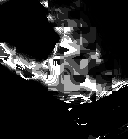

Keep Y or N: y
Picture 1 was stored


In [ ]:

#A T C

VideoCapture() 
eval_js('create()') 

Cascade_visage = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

FDetect=False
margin = 30
restr = 30

Picture_count=int(input("How many pictures do you want? "))# the number of picture to be taken
Time=int(input("How many seconds between each photo? "))
x=0
picture_store =[]


while not FDetect:
  bigrect=[] 
  byte = eval_js('capture()')
  #norm_rgb = normalized(byte)
  im = byte2image(byte)
  #norm_rgb = normalized(im)
  gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) # convert the image into GRAY
  hsv =  cv2.cvtColor(im, cv2.COLOR_RGB2HSV) #convert image to color
  face = detect(gray, cascade = Cascade_visage) # face contains the rectangle
  
  if len(face)==0:
    FDetect=False
  else:
    FDetect=True

    
  if FDetect: # if a face is found

  
    r_face = rest(face[0])
    hsv_roi=hsv[r_face[1]:r_face[3], r_face[0]:r_face[2]] # !!! better to restrict this face for the histogram
    mask_roi = cv2.inRange(hsv_roi, np.array((0., 60., 32.)), np.array((180., 255., 255.)))
    kernel= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,1))
    mask_roi = cv2.morphologyEx(mask_roi, cv2.MORPH_CLOSE, kernel) #removes unnecessary black noises from the white region.
    #Closing is reverse of Opening, Dilation followed by Erosion.
    mask_roi = cv2.morphologyEx(mask_roi, cv2.MORPH_OPEN, kernel) #removes white noise from the black region of the mask.
    #Opening is just another name of erosion followed by dilation.
    bigrect.append(compute_coordinates(face[0])) # compute bigrect and add to the list

    Detection=True # set a flag to start camshift


    hist=cv2.calcHist([hsv_roi], [0], mask_roi, [180], [0,180]) # compute the histogram

    # Region of interest identified
    
    hist=cv2.normalize(hist, hist,  alpha=0, beta=255, norm_type=cv2.NORM_MINMAX) # normalize the histogram 

  
    track_window = (face[0][0], face[0][1], face[0][2], face[0][3])
   # sets some criteria to iterate 10 times
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 ) ##


while Detection:


    byte = eval_js('capture()')
    im = byte2image(byte)
    gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) # convert the image into GRAY
    hsv =  cv2.cvtColor(im, cv2.COLOR_RGB2HSV) #
    mask = cv2.inRange(hsv, np.array((0,64,32)), np.array((180,200,200)))
    # (0,64,32) ( 180, 200,200)
      # compute the region of interest (bigrect)
    raw_im = cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)
    prob = cv2.calcBackProject([hsv], [0], hist, [0, 180], 1) 

      

      # perform camshift over the track_window

      
    
    for i in range(bigrect[0][0], bigrect[0][2]): # iteration  between coordinates
      for j in range(bigrect[0][1], bigrect[0][3]): 
        prob[j,i]=0 # sets probability matrix to 0 on all points inside bigrect

    prob &= mask

    track_box, track_window = cv2.CamShift(prob, track_window, term_crit)

    im[:] = prob[...,np.newaxis] # add probability matrix to the image


    cv2.rectangle(im, track_window , (255,255,255), 1)


    eval_js('showimg("{}")'.format(image2byte(im)))
    
    if x == Picture_count:
      break
    else:
      print("Starting", Time, "second timer for Picture", x+1)
      time.sleep(Time)
      
    print("Would you like to keep this picture?")
   
  
# Crop image
    cropped_image = im[int(track_window[1]):int(track_window[1]+track_window[3]), 
                          int(track_window[0]):int(track_window[0]+track_window[2]+)]

    cv2_imshow(cropped_image)
    keep_remove=input("Keep Y or N: ")
    
# Store the image
    if keep_remove == 'y':

      picture_store.append(cropped_image)
      print("Picture",x+1,"was stored")
      x+=1
      continue


    elif keep_remove =='n':
      x+=1
      continue

    else:
      print("Picture Storage is being cleaned")
      picture_store =[]
      cropped_image = 0 
      continue











1
100


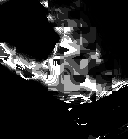

In [ ]:
# Test picture store kept the picture

print(len(picture_store))
storage.extend(picture_store)
print(len(storage))
cv2_imshow(picture_store[0])


# Task 6

Add the Text file line shuffler 

In [ ]:
# This function saves the image in 16x16 and 224x224 in the set format
# returns Letter, ID, Size
#letter_id_size.jpg
def Picture_save(storage): 
  # Sets the paths 
  path = "/content/drive/MyDrive/ComputerVision/Data/RSubDataset_3/" 
  Letter = input("Letter")

  Size= [16, 224] # To create an image in both 16 x16 and 224 x224
  for ID,image in enumerate(storage):
    for b in Size:
      file_name= Letter.upper()+"_" + str(ID) +"_"+  str(b)
      ### Changing the size of the picture
      im_size = cv2.resize(image, (b,b) , interpolation = cv2.INTER_AREA)
      cv2.imwrite(path + file_name + ".jpg", im_size)
      print(path+file_name)


In [ ]:
## Test for the Picture save function 
Picture_save(storage)

LetterC
/content/drive/MyDrive/ComputerVision/Data/RSubDataset_3/C_0_16
/content/drive/MyDrive/ComputerVision/Data/RSubDataset_3/C_0_224
/content/drive/MyDrive/ComputerVision/Data/RSubDataset_3/C_1_16
/content/drive/MyDrive/ComputerVision/Data/RSubDataset_3/C_1_224
/content/drive/MyDrive/ComputerVision/Data/RSubDataset_3/C_2_16
/content/drive/MyDrive/ComputerVision/Data/RSubDataset_3/C_2_224
/content/drive/MyDrive/ComputerVision/Data/RSubDataset_3/C_3_16
/content/drive/MyDrive/ComputerVision/Data/RSubDataset_3/C_3_224
/content/drive/MyDrive/ComputerVision/Data/RSubDataset_3/C_4_16
/content/drive/MyDrive/ComputerVision/Data/RSubDataset_3/C_4_224
/content/drive/MyDrive/ComputerVision/Data/RSubDataset_3/C_5_16
/content/drive/MyDrive/ComputerVision/Data/RSubDataset_3/C_5_224
/content/drive/MyDrive/ComputerVision/Data/RSubDataset_3/C_6_16
/content/drive/MyDrive/ComputerVision/Data/RSubDataset_3/C_6_224
/content/drive/MyDrive/ComputerVision/Data/RSubDataset_3/C_7_16
/content/drive/MyDrive/Co

In [ ]:
# This changes the shape of the array of the 16x16 image and appens it into the text file dataset.txt
def Resize_N_Write(ID, Letter, text, folder):
  
  
  #SDataset=input("Choose SubDataset to save images to")
  path = "/content/drive/MyDrive/ComputerVision/Data/"
  #flat_sixteen  = im_16.shape([1,256])
  img = cv2.imread(path + folder + "/" + Letter + "_" + str(ID) + "_"+"16.jpg")
  #print(path + folder + "/" + Letter + "_" + str(ID) + "_" + "16.jpg")
  res = cv2.resize(img, dsize=(1,256), interpolation=cv2.INTER_CUBIC) # 16x16 to (1,256) 1row | 256 columns
  flat_res = [str(a[0][0]) for a in res] # 1 with 256 elem
  #print(flat_res)

  ## write this flat_res to file 

  is_empty = False
  try:
    with  open("/content/gdrive/MyDrive/ComputerVision/Data/"+ folder + '/' + text, "r") as fileobj: # open the dataset in read mode
      if len(fileobj.readlines())==0: # checks if the dataset is empty
        is_empty = True
  except:
    is_empty == True # if the dataset does not exist, set the empty variable to true
    
  with open("/content/drive/MyDrive/ComputerVision/Data/"+ folder + '/'+ text, "a+") as fileobj: # open the dataset in append mode
    L_list=[letter, *flat_res] # create a list with the letter as first element, followed by all the values of the pixels
    str_list = str(L_list)
    str_list = str_list.replace('\'','')[1:-1] # remove the quotes and the brackets
    if is_empty:
      fileobj.write(str_list + '\n')#Creates file if file doesnt exist/also appends 
      
    elif is_empty == False:
      fileobj.write(str_list+'\n')#Creates file if file doesnt exist/also appends
     



In [ ]:
folder = "RSubDataset_1"
text = "dataset_1.txt"
print("/content/gdrive/MyDrive/ComputerVision/Data/"+ folder + '/'+ text)

/content/gdrive/MyDrive/ComputerVision/Data/RSubDataset_1/dataset_1.txt


In [ ]:
dataset = "dataset.txt"
alphabet = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
L_list = ["A", "T", "C"]
dataset_1 = "dataset1.txt"
dataset_2 = "dataset2.txt"
dataset_3 = "dataset3.txt"

n_images = 100 
reduced_num = 50

In [ ]:
img_path = "/content/drive/MyDrive/ComputerVision/SubDataset_

SyntaxError: ignored

In [ ]:
print(n_images)
print(range(n_images))

100
range(0, 100)


In [ ]:
# reads the images and then converts to (1,256) and then appends them to a text file
for q in range(n_images):
  for letter in L_list:
    Resize_N_Write(q, letter, 'dataset_1.txt', 'RSubDataset_1') # change this to match the subset 

In [ ]:
for i in range(reduced_num):
  for letter in L_list[0]:
    Resize_N_Write(i, letter, "dataset_2.txt", 'RSubDataset_2')
for q in range(n_images):
  for letter in L_list[1:]:
    Resize_N_Write(q, letter, "dataset_2.txt", 'RSubDataset_2') # change this to match the subset 

In [ ]:
for q in range(n_images):
  for letter in L_list:
    Resize_N_Write(q, letter, "dataset_3.txt", 'RSubDataset_3') # change this to match the subset 

In [ ]:
import random #this doesn't change anything with or without new line breaks or inside brackets
data = [1, 2 ,3]
for d in data:
  lines = open("/content/drive/MyDrive/ComputerVision/Data/RSubDataset_"+str(d)+"/dataset_"+str(d)+".txt").readlines()
  random.shuffle(lines)
  open("/content/drive/MyDrive/ComputerVision/Data/RSubDataset_"+str(d)+"/dataset_"+str(d)+"r.txt", 'w').writelines(lines)

In [ ]:
lines = open("/content/drive/MyDrive/ComputerVision/Data/RSubDataset_1/dataset_1.txt").readlines()
random.shuffle(lines)
open("/content/drive/MyDrive/ComputerVision/Data/RSubDataset_1/dataset_1.txt", 'w').writelines(lines)

In [ ]:
lines = open("/content/drive/MyDrive/ComputerVision/Data/RSubDataset_2/dataset_2.txt").readlines()
random.shuffle(lines)
open("/content/drive/MyDrive/ComputerVision/Data/RSubDataset_2/dataset_2.txt", 'w').writelines(lines)

In [ ]:
lines = open("/content/drive/MyDrive/ComputerVision/Data/RSubDataset_2/dataset_2.txt").readlines()
random.shuffle(lines)
open("/content/drive/MyDrive/ComputerVision/Data/RSubDataset_2/dataset_2.txt", 'w').writelines(lines)

In [ ]:
dataset_file_path1 = "/content/drive/MyDrive/ComputerVision/Data/RSubDataset_1/dataset_1.txt"
dataset_file_path2 = "/content/drive/MyDrive/ComputerVision/Data/RSubDataset_2/dataset_2.txt"
dataset_file_path3 = "/content/drive/MyDrive/ComputerVision/Data/RSubDataset_3/dataset_3.txt"

In [ ]:
#The following function takes the dataset file and returns two arrays: samples and letters.
def load_dataset(dataset_file_path):
    a = np.loadtxt(dataset_file_path, delimiter=',', converters={ 0 : lambda ch : ord(ch)-ord('A') })
    samples, letters = a[:,1:], a[:,0] # samples takes all the rows and all the columns except the first column
    # letters: keep only the first column
    return samples, letters

In [ ]:
#here we split the dataset for training and validation
train_ratio = 0.7
samples, letters = load_dataset(dataset_file_path1)
n_train_samples = int(len(samples) * train_ratio)
x_train, y_train = samples[:n_train_samples], letters[:n_train_samples] # keeps only the first 70% of rows
x_val, y_val = samples[n_train_samples:], letters[n_train_samples:] # keeps only the last 30%
print(x_train.shape)

(210, 256)


# Training the models 

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from keras import layers

num_classes = 26 # number of letters
epochs = 100 # number of training s


#here we split the dataset for training and validation
train_ratio = 0.7
samples, letters = load_dataset(dataset_file_path3)
n_train_samples = int(len(samples) * train_ratio)
x_train, y_train = samples[:n_train_samples], letters[:n_train_samples] # keeps only the first 70% of rows
x_val, y_val = samples[n_train_samples:], letters[n_train_samples:] # keeps only the last 30%

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_train /= 255 # x_train=x_train/255    normalize the numbers in the interval [0,1]
x_val /= 255
print(x_train.shape[0], 'train samples') # print the number of images
print(x_val.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes) # converts the prediction letter into a number encoding for that letter
y_val = tf.keras.utils.to_categorical(y_val, num_classes)


model = Sequential() 
tf.keras.layers.RandomFlip("horizontal") # applied augmentation however, some despite increasing the num of epochs reduce val accuracy
model.add(Dense(26, activation='relu', input_shape=(256,))) # add a relu layer
model.add(Dense(52, activation='relu')) # add another relu
model.add(Dropout(0.7)) # add a regularizator, This helps to reduce the validation over time(could affect accuracy)
model.add(Dense(208, activation='relu')) # add anothe relu
model.add(Dense(6656, activation='relu')) # add another relu  # Created a layer with thousands of neuron and to then pass into a smaller layer 
model.add(Dense(13, activation='relu')) # add anotherr relu # this smaller helps to compress and learn more complex features. 
#model.add(Dropout(0.2)) # add a regularizator
model.add(Dense(6, activation='relu')) # add anothe relu # Another compression into the output
model.add(Dense(num_classes, activation='softmax'))  # add a final softmax layer

#Increased the complexity of the model to improve the accuracy as the poisson loss was relatively low. 

model.summary()

# Added a learning that slowly decays over time to help improve finding a minimum
# Need to make sure it is not to small so that the updates are able to change the accuracy
# but not pass by the global min.
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=.001, # The best value was a low learning that decreased overtime
    decay_steps=10000,
    decay_rate=0.9)

opt = tf.keras.optimizers.Adam(lr_schedule )

model.compile(loss='poisson',
              optimizer=opt,
              metrics=['accuracy'])
# Used poisson loss adam optimizer 

history = model.fit(x_train, y_train,   
                    epochs=epochs,
                    verbose=1, # if verbose=1 print data for each epoch
                    validation_data=(x_val, y_val)) # train the network
score = model.evaluate(x_val, y_val, verbose=0)  #model and dataset
print('Validation loss:', score[0]) # print the loss
print('Validation accuracy:', score[1]) # print the accuracy

210 train samples
90 test samples
Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_287 (Dense)           (None, 26)                6682      
                                                                 
 dense_288 (Dense)           (None, 52)                1404      
                                                                 
 dropout_47 (Dropout)        (None, 52)                0         
                                                                 
 dense_289 (Dense)           (None, 208)               11024     
                                                                 
 dense_290 (Dense)           (None, 6656)              1391104   
                                                                 
 dense_291 (Dense)           (None, 13)                86541     
                                                                 
 dense_292 (Dense) 

#Save model to Disk

In [ ]:
model_json = model.to_json()
with open("/content/drive/MyDrive/ComputerVision/Data/RSubDataset_3/model3.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("/content/drive/MyDrive/ComputerVision/Data/RSubDataset_3/model3_weights.h5")
print("Saved model to disk")

Saved model to disk


# Evaluation of the Models

In [ ]:
def evaluate_model(path, model):
  train_ratio = 0.7
  samples, letters = load_dataset(path) # load the dataset
  n_train_samples = int(len(samples) * train_ratio)
  x_train, y_train = samples[:n_train_samples], letters[:n_train_samples] # keeps only the first 70% of rows
  x_val, y_val = samples[n_train_samples:], letters[n_train_samples:] # keeps only the last 30%
  x_train = x_train.astype('float32')
  x_val = x_val.astype('float32')
  x_train /= 255 # x_train=x_train/255    normalize the numbers in the interval [0,1]
  x_val /= 255
  
  print(x_train.shape[0], 'train samples') # print the number of images
  print(x_val.shape[0], 'test samples')

  # convert class vectors to binary class matrices
  y_train = tf.keras.utils.to_categorical(y_train, num_classes) # converts the prediction letter into a number encoding for that letter
  y_val = tf.keras.utils.to_categorical(y_val, num_classes)


  score = model.evaluate(x_val, y_val, verbose=0) # valuta il modello ottenuto sul validation set.  #model and dataset
  print('Validation loss:', score[0]) # print the loss
  print('Validation accuracy:', score[1]) # print the accuracy

In [ ]:
from keras.models import model_from_json
g_path = "/content/drive/MyDrive/ComputerVision/Data/"
# load json and create model
json_file = open(g_path+'RSubDataset_1/model1.json', 'r') 
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.summary()
# load weights into new model
loaded_model.load_weights(g_path+"RSubDataset_1/model1_weights.h5")

loaded_model.compile(loss='poisson',
              optimizer='adam',
              metrics=['accuracy'])

dataset_file_paths = [g_path+"RSubDataset_1/dataset_1.txt", g_path+"RSubDataset_2/dataset_2.txt", g_path+"RSubDataset_3/dataset_3.txt"]
for path in dataset_file_paths:
  print(path)
  evaluate_model(path, loaded_model)

 

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_273 (Dense)           (None, 26)                6682      
                                                                 
 dense_274 (Dense)           (None, 52)                1404      
                                                                 
 dropout_45 (Dropout)        (None, 52)                0         
                                                                 
 dense_275 (Dense)           (None, 208)               11024     
                                                                 
 dense_276 (Dense)           (None, 6656)              1391104   
                                                                 
 dense_277 (Dense)           (None, 13)                86541     
                                                                 
 dense_278 (Dense)           (None, 6)               

In [ ]:
from keras.models import model_from_json
g_path = "/content/drive/MyDrive/ComputerVision/Data/"
# load json and create model
json_file = open(g_path+'RSubDataset_2/model2.json', 'r') 
loaded_model_json = json_file.read()
json_file.close()
loaded_model2 = model_from_json(loaded_model_json)

loaded_model2.summary()
# load weights into new model
loaded_model2.load_weights(g_path+"RSubDataset_2/model2_weights.h5")

loaded_model2.compile(loss='poisson',
              optimizer='adam',
              metrics=['accuracy'])

dataset_file_paths = [g_path+"RSubDataset_1/dataset_1.txt", g_path+"RSubDataset_2/dataset_2.txt", g_path+"RSubDataset_3/dataset_3.txt"]
for path in dataset_file_paths:
  print(path)
  evaluate_model(path, loaded_model2)

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_280 (Dense)           (None, 26)                6682      
                                                                 
 dense_281 (Dense)           (None, 52)                1404      
                                                                 
 dropout_46 (Dropout)        (None, 52)                0         
                                                                 
 dense_282 (Dense)           (None, 208)               11024     
                                                                 
 dense_283 (Dense)           (None, 6656)              1391104   
                                                                 
 dense_284 (Dense)           (None, 13)                86541     
                                                                 
 dense_285 (Dense)           (None, 6)               

In [ ]:
from keras.models import model_from_json
g_path = "/content/drive/MyDrive/ComputerVision/Data/"
# load json and create model
json_file = open(g_path+'RSubDataset_3/model3.json', 'r') 
loaded_model_json = json_file.read()
json_file.close()
loaded_model3 = model_from_json(loaded_model_json)

loaded_model3.summary()
# load weights into new model
loaded_model3.load_weights(g_path+"RSubDataset_3/model3_weights.h5")

loaded_model3.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

dataset_file_paths = [g_path+"RSubDataset_1/dataset_1.txt", g_path+"RSubDataset_2/dataset_2.txt", g_path+"RSubDataset_3/dataset_3.txt"]
for path in dataset_file_paths:
  print(path)
  evaluate_model(path, loaded_model3)

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_287 (Dense)           (None, 26)                6682      
                                                                 
 dense_288 (Dense)           (None, 52)                1404      
                                                                 
 dropout_47 (Dropout)        (None, 52)                0         
                                                                 
 dense_289 (Dense)           (None, 208)               11024     
                                                                 
 dense_290 (Dense)           (None, 6656)              1391104   
                                                                 
 dense_291 (Dense)           (None, 13)                86541     
                                                                 
 dense_292 (Dense)           (None, 6)               

In [ ]:

#A T C

VideoCapture() 
eval_js('create()') 

Cascade_visage = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

FDetect=False
margin = 30
restr = 30

x=0
picture_store =[]


while not FDetect:
  bigrect=[] 
  byte = eval_js('capture()')
  #norm_rgb = normalized(byte)
  im = byte2image(byte)
  #norm_rgb = normalized(im)
  gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) # convert the image into GRAY
  hsv =  cv2.cvtColor(im, cv2.COLOR_RGB2HSV) #convert image to color
  face = detect(gray, cascade = Cascade_visage) # face contains the rectangle
  
  if len(face)==0:
    FDetect=False
  else:
    FDetect=True

    
  if FDetect: # if a face is found

  
    r_face = rest(face[0])
    hsv_roi=hsv[r_face[1]:r_face[3], r_face[0]:r_face[2]] # !!! better to restrict this face for the histogram
    mask_roi = cv2.inRange(hsv_roi, np.array((0., 60., 32.)), np.array((180., 255., 255.)))
    kernel= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,1))
    mask_roi = cv2.morphologyEx(mask_roi, cv2.MORPH_CLOSE, kernel) #removes unnecessary black noises from the white region.
    #Closing is reverse of Opening, Dilation followed by Erosion.
    mask_roi = cv2.morphologyEx(mask_roi, cv2.MORPH_OPEN, kernel) #removes white noise from the black region of the mask.
    #Opening is just another name of erosion followed by dilation.
    bigrect.append(compute_coordinates(face[0])) # compute bigrect and add to the list

    Detection=True # set a flag to start camshift


    hist=cv2.calcHist([hsv_roi], [0], mask_roi, [180], [0,180]) # compute the histogram

    # Region of interest identified
    
    hist=cv2.normalize(hist, hist,  alpha=0, beta=255, norm_type=cv2.NORM_MINMAX) # normalize the histogram 

  
    track_window = (face[0][0], face[0][1], face[0][2], face[0][3])
   # sets some criteria to iterate 10 times
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 ) ##


while Detection:

   
    #term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 ) ##

    byte = eval_js('capture()')
    im = byte2image(byte)
    #im = cv2.normalize(im, gray, 0, 180, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC3)
    gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) # convert the image into GRAY
    hsv =  cv2.cvtColor(im, cv2.COLOR_RGB2HSV) #
    mask = cv2.inRange(hsv, np.array((0,64,32)), np.array((180,200,200)))
    # (0,64,32) ( 180, 200,200)
      # compute the region of interest (bigrect)
    raw_im = cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)
    #im = cv2.normalize(im, hsv, 0, 180, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC3)

    #prob = cv2.calcBackProject([hsv], [0], hist, [0, 255], 1) # compute the probability matrix 
    prob = cv2.calcBackProject([hsv], [0], hist, [0, 180], 1) 

      

      # perform camshift over the track_window

      
    
    for i in range(bigrect[0][0], bigrect[0][2]): # iteration  between coordinates
      for j in range(bigrect[0][1], bigrect[0][3]): 
        prob[j,i]=0 # sets probability matrix to 0 on all points inside bigrect

    prob &= mask

    track_box, track_window = cv2.CamShift(prob, track_window, term_crit)

    im[:] = prob[...,np.newaxis] # add probability matrix to the image


    #eval_js('showimg("{}")'.format(image2byte(im)))
    

    cropped_image = im[int(track_window[1]):int(track_window[1]+track_window[3]), int(track_window[0]):int(track_window[0]+track_window[2])]


# Implementing the model on the vidoe
    resized_img = cv2.resize(cropped_image, (16, 16), interpolation = cv2.INTER_AREA)
    resized_img = cv2.resize(resized_img, dsize=(1,256), interpolation=cv2.INTER_CUBIC)
    resized_img = np.array([str(a[0][0]) for a in resized_img])
    resized_img=resized_img.astype('float32')
    resized_img /= 255.0
    prediction = loaded_model3.predict(resized_img[np.newaxis, :]) # where hand_image is the probability image of your hand of size (1,256)
    prediction = prediction.argmax()
    predicted_letter = chr(ord('A') + prediction)

    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(im, predicted_letter, (int(track_window[0]), int(track_window[1])), font, 1, (0, 255, 0), 1, cv2.LINE_4)

    eval_js('showimg("{}")'.format(image2byte(im)))
    x+=1
    continue










MessageError: ignored

# The Models 1, 2, and 3



Dataset 1: 
The first dataset looks at three letters with high variability. This dataset emphasizes how variability impacts the training of the model. The model itself performed worse on dataset 2 and 3, which is due to the high variability. For the model to perform better more data would be needed and a longer training time is required. However, with the increase in data and the longer training time the increased variability would in fact make the model more robust when applied to the real world. 

Dataset 2: 
The second dataset focuses on three letters with varying amounts of images to train the model. This leads the model to make increasingly inaccurate predictions on certain classes as it is unable to differentiate differences between spatial aspects of the pixels. This reduces accuracy for some classes and makes the model less robust for certain hand gestures. 

Dataset 3: 
The third dataset has the highest loss due to its lack of variability. It focuses on three letters with low variability. Looking at the accuracy it has, it is worse than the other two models as it cannot generalize any variability in the pictures. Meaning, if the hand is tilted if you use the opposite hand, it won't be able to accurately predict the gesture.

The Model:
The model I developed consists of 5 relu hidden layers with varying number of neurons ,input relu layer with 26 neurons, and an output softmax layer. There is one dropout layer with a probability set to .7. Overall, there are 1,497,021 parameters, this was developed in an attempt to improve the validation accuracy, over 100 epochs. To help avoid overfitting and to increase the data size an augmentation was added to horizontal flip the image or the image matrix. Dropout was placed closer before the layer with more drastic increases in the number of neuron because it helps to reduce validation loss and improve generalization, without impacting more complex features. I implemented a compression from a dense layer of 6656 to 13  to compress more basic features learning into more complex ones to improve accuracy. With other parameters I tested them out multiple times with specific values. In regards to the learning rate, i set up a learning rate scheduler that exponentially decays the initial learning rate so that it is able to find an optimum minimum without resulting in divergence.


